# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
#Data Visualization and Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas_profiling as pdp

#Configure
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [3]:
#pip install sklearn.svn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgbn
import catboost as cb
from sklearn.ensemble import AdaBoostClassifier

#Model Selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [4]:
#Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

In [5]:
#Evaluation Metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score # for classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Reading the Dataset

In [24]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.shape

(5110, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Univariate Analysis

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

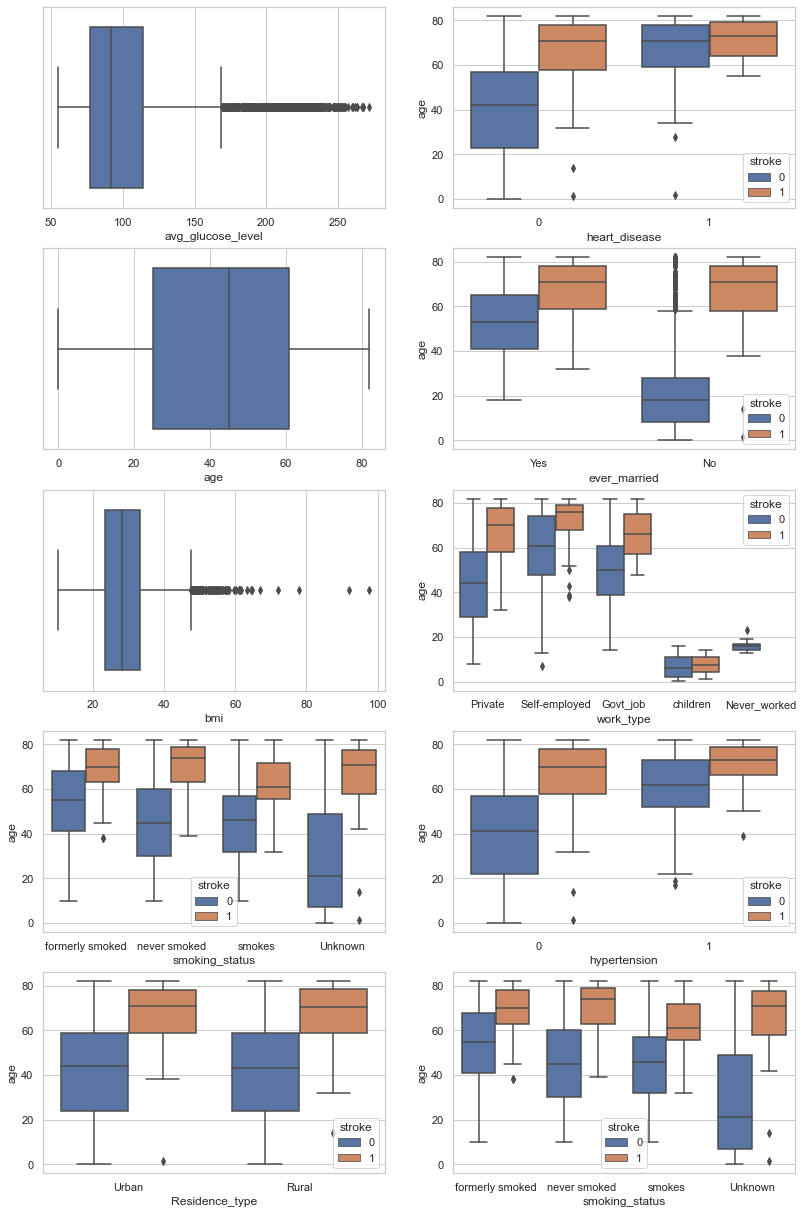

In [25]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(12,20))
sns.boxplot(x= 'avg_glucose_level', data=df, ax=axes[0][0])
sns.boxplot(x= 'age', data=df, ax=axes[1][0])
sns.boxplot(x= 'bmi', data=df, ax=axes[2][0])
sns.boxplot(x= 'smoking_status', y = 'age', hue = 'stroke', data =df,ax=axes[3][0])
sns.boxplot(x= 'hypertension',y = 'age', hue = 'stroke', data =df,ax=axes[3][1])
sns.boxplot(x= 'heart_disease',y = 'age', hue = 'stroke', data =df,ax=axes[0][1])
sns.boxplot(x= 'ever_married',y = 'age', hue = 'stroke', data =df,ax=axes[1][1])
sns.boxplot(x='work_type',y = 'age', hue = 'stroke', data =df,ax=axes[2][1])
sns.boxplot(x= 'Residence_type',y = 'age', hue = 'stroke', data =df,ax=axes[4][0])
sns.boxplot(x= 'smoking_status',y = 'age', hue = 'stroke', data =df,ax=axes[4][1])

# Bivariate Analysis

<AxesSubplot:xlabel='stroke', ylabel='smoking_status'>

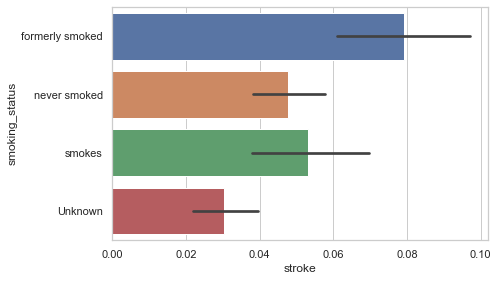

In [26]:
sns.barplot(x='stroke',y='smoking_status',data=df)

In [27]:
replace_values={'Unknown':'never smoked'}
df=df.replace({'smoking_status':replace_values})
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Multivariate Analysis

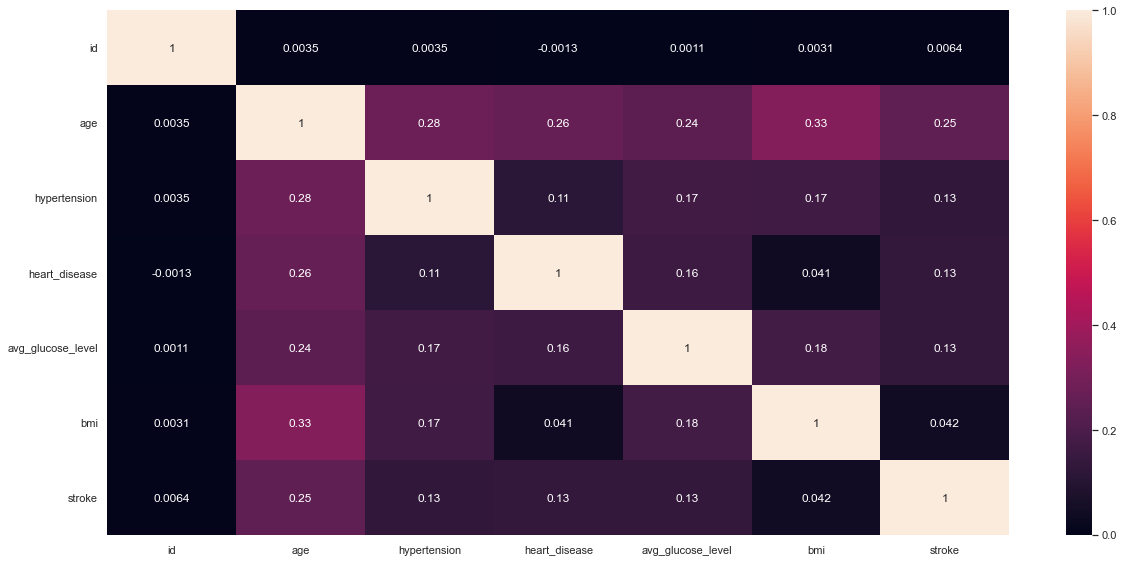

In [28]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Descriptive Analysis

In [13]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Preprocessing

In [29]:
#Drop unwanted features
df=df.drop('id',axis=1)

In [15]:
df.shape

(5110, 11)

In [30]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [31]:
#Handling For Null Values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [32]:
df.dropna(inplace=True)

In [33]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [34]:
df.shape

(4909, 11)

In [35]:
#Handling Outliers
def remove_outliers(data):
    arr=[]
    #print(max(list(data)))
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    mi=q1-(1.5*iqr)
    ma=q3+(1.5*iqr)
    #print(mi,ma)
    for i in list(data):
        if i<mi:            
            i=mi
            arr.append(i)
        elif i>ma:
            i=ma
            arr.append(i)
        else:
            arr.append(i)
    #print(max(arr))
    return arr

In [36]:
df['bmi']=remove_outliers(df['bmi'])
df['avg_glucose_level']=remove_outliers(df['avg_glucose_level'])
print('Outliers successfully removed')

Outliers successfully removed


<AxesSubplot:xlabel='avg_glucose_level'>

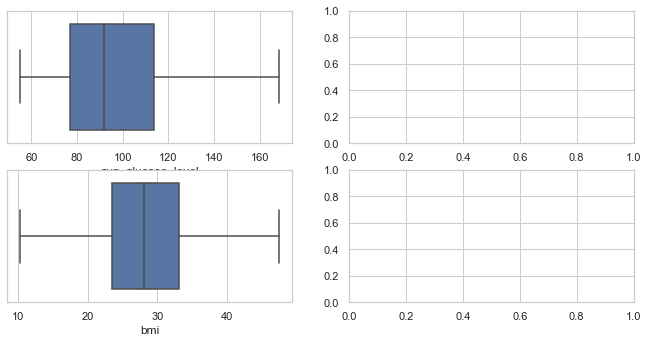

In [37]:
#Checking whether Outliers removed or not
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,5))
sns.boxplot(x= 'bmi', data=df, ax=axes[1][0])
sns.boxplot(x= 'avg_glucose_level', data=df, ax=axes[0][0])

In [38]:
#Handling Categorical Values
for i in['gender','ever_married','work_type','Residence_type','smoking_status']:
    print(df[i].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes']


In [39]:
#Label Encoding on Categorical Variables
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
le2=LabelEncoder()
df['Residence_type']=le1.fit_transform(df['Residence_type'])
df['ever_married']=le2.fit_transform(df['ever_married'])

In [40]:
#Saving the encoding
import joblib
joblib.dump(le1,"res_transform")
joblib.dump(le2,"mar_transform")

['mar_transform']

In [41]:
df.shape

(4909, 11)

In [42]:
df.iloc[0,:]

gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                       1
work_type                    Private
Residence_type                     1
avg_glucose_level             168.32
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object

In [43]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,168.32,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,1,168.32,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,168.32,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,1,168.32,29.0,formerly smoked,1


In [44]:
#Handling Numerically Converted Categorical Values
x=df.iloc[:,0:10].values
y=df.iloc[:,10].values

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([("onehot",OneHotEncoder(drop='first'),[0,5,9])],remainder="passthrough")
x=ct.fit_transform(x)

In [49]:
#Save the transform
joblib.dump(ct,"column")

['column']

In [50]:
x

array([[1.0, 0.0, 0.0, ..., 1, 168.32, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 105.92, 32.5],
       [0.0, 0.0, 0.0, ..., 1, 168.32, 34.4],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [1.0, 0.0, 0.0, ..., 0, 166.29, 25.6],
       [0.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

In [51]:
x[0]

array([1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 67.0, 0, 1, 1, 1, 168.32,
       36.6], dtype=object)

In [52]:
#Oversampling
x.shape

(4909, 15)

In [53]:
y.shape

(4909,)

<AxesSubplot:ylabel='count'>

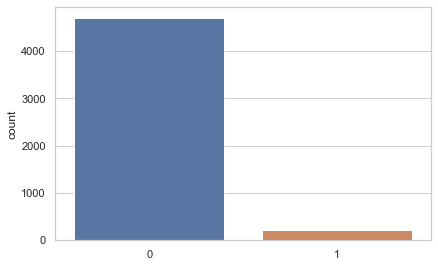

In [54]:
#before oversampling
sns.countplot(y)

In [55]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_res,y_res=sm.fit_resample(x,y)

print("Before Oversampling,counts of label '1':{}".format(sum(y==1)))
print("Before Oversampling,counts of label '0':{} \n".format(sum(y==0)))

print("After Oversampling, the shape of train_X:{}".format(x_res.shape))
print("After Oversampling,counts of label '1':{}".format(y_res.shape))

print("After Oversampling,counts of label '1':{}".format(sum(y_res==1)))
print("After Oversampling,counts of label '0':{}".format(sum(y_res==0)))

Before Oversampling,counts of label '1':209
Before Oversampling,counts of label '0':4700 

After Oversampling, the shape of train_X:(9400, 15)
After Oversampling,counts of label '1':(9400,)
After Oversampling,counts of label '1':4700
After Oversampling,counts of label '0':4700


<AxesSubplot:ylabel='count'>

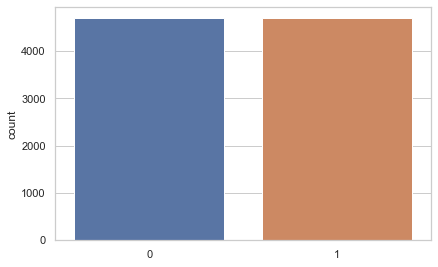

In [56]:
#After Oversampling
sns.countplot(y_res)

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [58]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print('***Decision Tree Model Results***')
print(confusion_matrix(dtc_pred,y_test))
print(classification_report(dtc_pred,y_test))

***Decision Tree Model Results***
[[868  50]
 [ 54 908]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       918
           1       0.95      0.94      0.95       962

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



In [59]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred=dtc.predict(x_test)
print('**Random Forest**')
print(confusion_matrix(rf_pred,y_test))
print(classification_report(rf_pred,y_test))

**Random Forest**
[[868  50]
 [ 54 908]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       918
           1       0.95      0.94      0.95       962

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



In [60]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=dtc.predict(x_test)
print('***Logistic Regression***')
print(confusion_matrix(dtc_pred,y_test))
print(classification_report(dtc_pred,y_test))

***Logistic Regression***
[[868  50]
 [ 54 908]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       918
           1       0.95      0.94      0.95       962

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880



In [61]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
print('**Support vector classifier**')
print(confusion_matrix(svc_pred,y_test))
print(classification_report(svc_pred,y_test))

**Support vector classifier**
[[633 155]
 [289 803]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       788
           1       0.84      0.74      0.78      1092

    accuracy                           0.76      1880
   macro avg       0.76      0.77      0.76      1880
weighted avg       0.77      0.76      0.77      1880



In [62]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('**K-Nearest Neighbours**')
print(confusion_matrix(knn_pred,y_test))
print(classification_report(knn_pred,y_test))

**K-Nearest Neighbours**
[[757  14]
 [165 944]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       771
           1       0.99      0.85      0.91      1109

    accuracy                           0.90      1880
   macro avg       0.90      0.92      0.90      1880
weighted avg       0.92      0.90      0.91      1880



# Grid Search

In [63]:
cross_valid_scores={}

# Decision Tree

In [65]:
%%time
parameters={
    "max_depth":[3,5,7,9,11,13],
}
model_dtc=DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
)
model_dtc=GridSearchCV(
    model_dtc,
    parameters,
    cv=5,
)
model_dtc.fit(x_train,y_train)
model_dtc_pred=model_dtc.predict(x_test)
print('**Applying Grid Search to Decision tree**')
print(classification_report(model_dtc_pred,y_test))
print(f'Best parameters{model_dtc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+\
    f'{model_dtc.best_score_:.3f}'
)
cross_valid_scores['decision_tree']=model_dtc.best_score_
print('-----')

**Applying Grid Search to Decision tree**
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       926
           1       0.95      0.95      0.95       954

    accuracy                           0.95      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.95      0.95      0.95      1880

Best parameters{'max_depth': 13}
Mean cross-validated accuracy score of the best_estimator: 0.950
-----
Wall time: 856 ms


# Random Forest Model

In [66]:
parameters={
    "n_estimators":[5,10,15,20,25],
    "max_depth":[3,5,7,9,11,13],
}
model_rf=RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
)
model_rf=GridSearchCV(
    model_rf,
    parameters,
    cv=5,
)
model_rf.fit(x_train,y_train)
model_rf_pred=model_rf.predict(x_test)
print('** Applying Grid Search to Random Forest**')
print(classification_report(model_rf_pred,y_test))
print(f'Best parameters {model_rf.best_params_}')
print(
    f'Mean cross-validated accuarcy score of the best_estimator: '+\
    f'{model_rf.best_score_:.3f}'
)
cross_valid_scores['random_forest']=model_rf.best_score_
      

** Applying Grid Search to Random Forest**
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       949
           1       0.96      0.99      0.97       931

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880

Best parameters {'max_depth': 13, 'n_estimators': 25}
Mean cross-validated accuarcy score of the best_estimator: 0.972


In [67]:
#Saving the random forest model as it is the best model
import joblib
joblib.dump(model_rf,"model")

['model']